In [49]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
df = pd.read_csv('C:/Users/91954/data science pg program/mushrooms.csv')  
df


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [50]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [28]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

<AxesSubplot:xlabel='cap-shape', ylabel='class'>

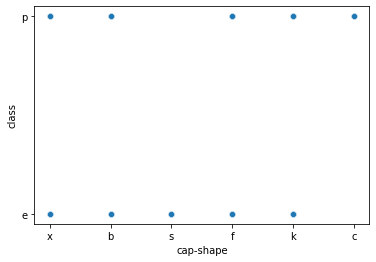

In [21]:
sns.scatterplot(x='cap-shape',y='class',data=df)

we can see that the cap-shape is mostly equally distributed in the range of x and k


<AxesSubplot:xlabel='cap-surface', ylabel='class'>

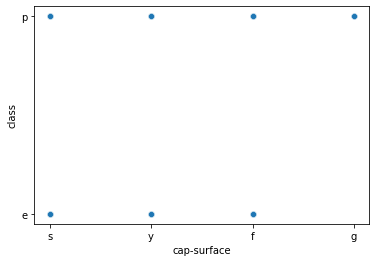

In [24]:
sns.scatterplot(x='cap-surface',y='class',data=df)

we can see that the cap-surface is mostly equally distributed in the range of s and g

<AxesSubplot:xlabel='cap-color', ylabel='class'>

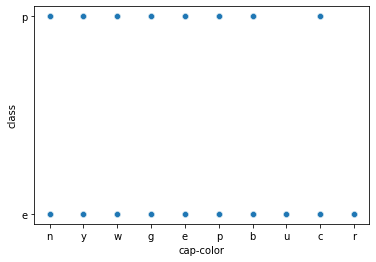

In [25]:
sns.scatterplot(x='cap-color',y='class',data=df)

we can see that the cap-color is mostly equally distributed in the range of n and r

<AxesSubplot:xlabel='bruises', ylabel='class'>

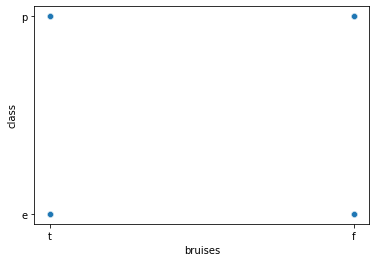

In [26]:
sns.scatterplot(x='bruises',y='class',data=df)

we can see that bruiese has not much to conclude

<AxesSubplot:xlabel='odor', ylabel='class'>

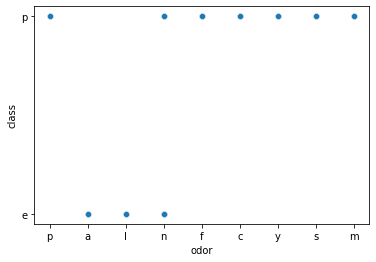

In [29]:
sns.scatterplot(x='odor',y='class',data=df)

we can see that odor has been distributed in two diffrent portions of the plot which shows that they have diiferent conclusion for different odor

<AxesSubplot:xlabel='gill-attachment', ylabel='class'>

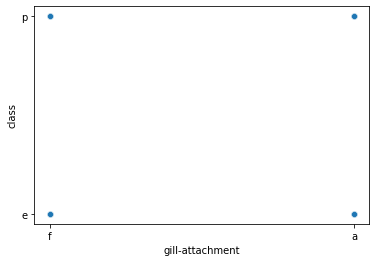

In [51]:
sns.scatterplot(x='gill-attachment',y='class',data=df)

In [ ]:
they 

<AxesSubplot:xlabel='gill-spacing', ylabel='class'>

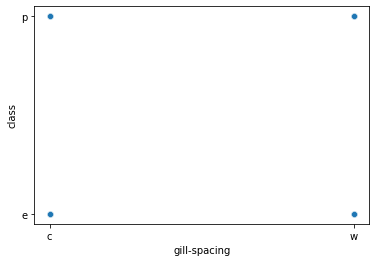

In [31]:
sns.scatterplot(x='gill-spacing',y='class',data=df)

<AxesSubplot:xlabel='gill-size', ylabel='class'>

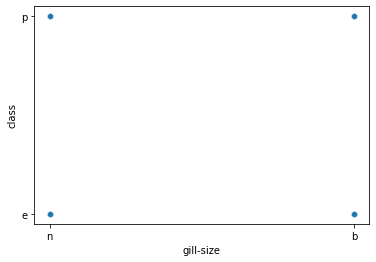

In [33]:
sns.scatterplot(x='gill-size',y='class',data=df)

<AxesSubplot:xlabel='gill-color', ylabel='class'>

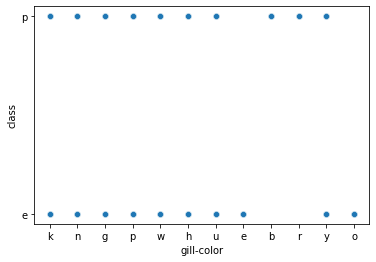

In [34]:
sns.scatterplot(x='gill-color',y='class',data=df)

<AxesSubplot:xlabel='stalk-shape', ylabel='class'>

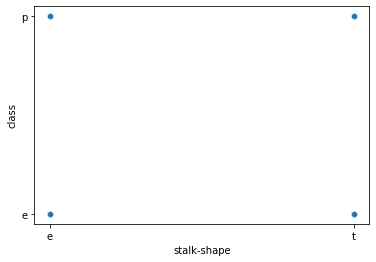

In [35]:
sns.scatterplot(x='stalk-shape',y='class',data=df)

<AxesSubplot:xlabel='stalk-root', ylabel='class'>

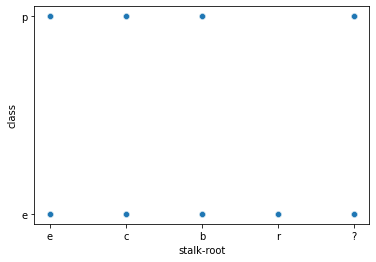

In [36]:
sns.scatterplot(x='stalk-root',y='class',data=df)

<AxesSubplot:xlabel='stalk-root', ylabel='class'>

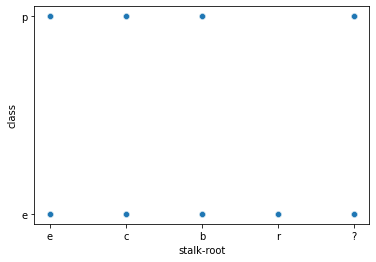

In [37]:
sns.scatterplot(x='stalk-root',y='class',data=df)

<AxesSubplot:xlabel='stalk-surface-above-ring', ylabel='class'>

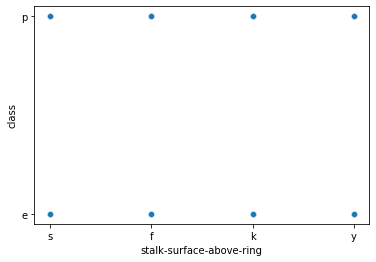

In [38]:
sns.scatterplot(x='stalk-surface-above-ring',y='class',data=df)

<AxesSubplot:xlabel='stalk-surface-below-ring', ylabel='class'>

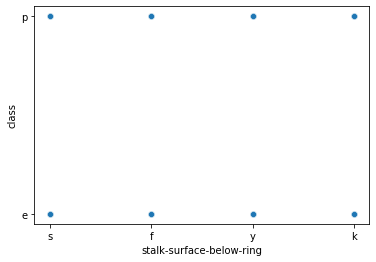

In [39]:
sns.scatterplot(x='stalk-surface-below-ring',y='class',data=df)

<AxesSubplot:xlabel='veil-type', ylabel='class'>

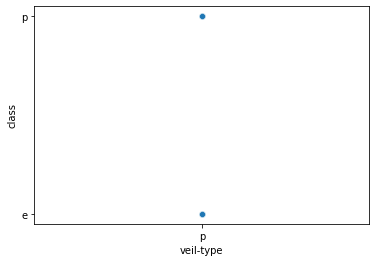

In [42]:
sns.scatterplot(x='veil-type',y='class',data=df)

<AxesSubplot:xlabel='veil-color', ylabel='class'>

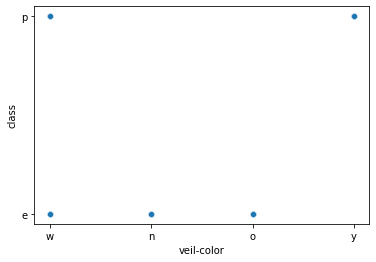

In [43]:
sns.scatterplot(x='veil-color',y='class',data=df)

<AxesSubplot:xlabel='ring-number', ylabel='class'>

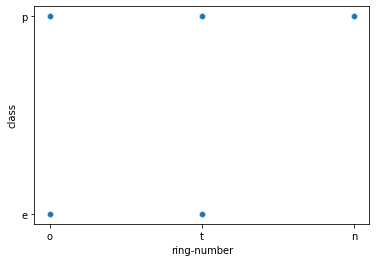

In [44]:
sns.scatterplot(x='ring-number',y='class',data=df)

<AxesSubplot:xlabel='ring-type', ylabel='class'>

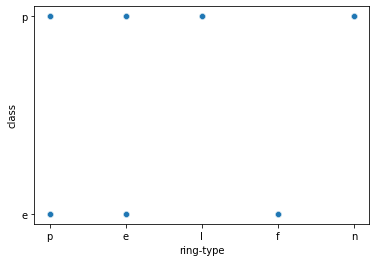

In [45]:
sns.scatterplot(x='ring-type',y='class',data=df)

<AxesSubplot:xlabel='spore-print-color', ylabel='class'>

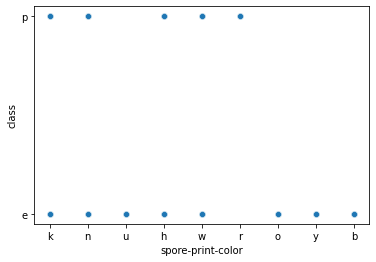

In [46]:
sns.scatterplot(x='spore-print-color',y='class',data=df)

<AxesSubplot:xlabel='population', ylabel='class'>

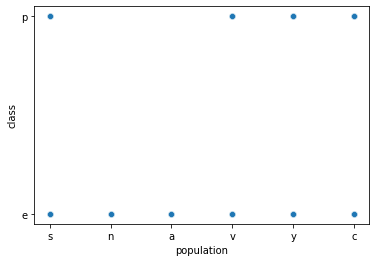

In [47]:
sns.scatterplot(x='population',y='class',data=df)

<AxesSubplot:xlabel='habitat', ylabel='class'>

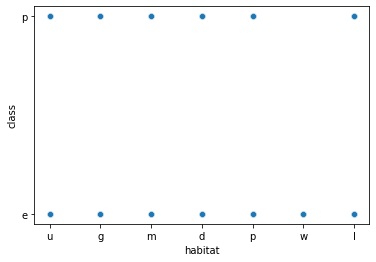

In [48]:
sns.scatterplot(x='habitat',y='class',data=df)

In [59]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [60]:
df.shape

(8124, 23)